In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Load your dataset using pandas
dataset = pd.read_excel("Superstore_USA.xlsx")

In [5]:
dataset.head(4)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.51,7,41.64,88523


In [12]:
dataset.shape #Tuple that returns rows, column count

(9426, 24)

In [11]:
#Missing value analysis
dataset.isnull().sum() #Identifies count of NaN values for attributes

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [13]:
#Fill missing values with mean
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [14]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority Analysis

In [16]:
#How many high priority order were placed?
#Univariate analysis
dataset['Order Priority'].value_counts()
#Critical appears twice in below group

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

In [18]:
#Check unique values for Order Priority column
dataset['Order Priority'].unique()
#'Critical' & 'Critical ' both are present
#This is a Data cleansing issue

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [21]:
#Clean the data
dataset['Order Priority']=dataset['Order Priority'].replace('Critical ','Critical')

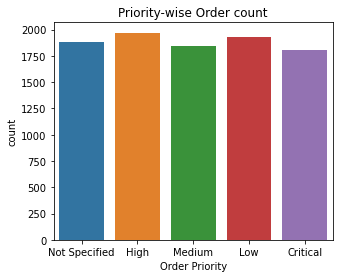

In [42]:
#Graphically analyze Order priority
#Countplot on categorical variable Order Priority
plt.figure(figsize=(5,4))
plt.title('Priority-wise Order count')
sns.countplot(x='Order Priority',data=dataset)
#Save the graph for later use in ppt or dashboard
plt.savefig('Priority-wise Order count.jpg')
plt.show()

In [44]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


# Shipping mode Analysis

In [47]:
#Identify most utilized shipping mode
#Opportunity to negotiate margin deal with the vendors due to bulk utilization
#Reduce operational cost
dataset['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

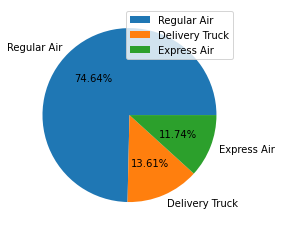

In [69]:
#Graphical analysis
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values
plt.pie(y,labels=x,autopct='%0.2f%%')
plt.legend()
plt.show()
#Regular air shipping is the most used mode

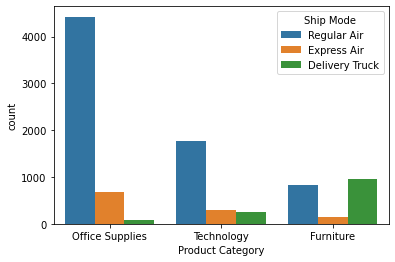

In [71]:
#Bivariate Analysis
#What are the shipping mode usage pattern in each Product category?
sns.countplot(x='Product Category',data=dataset,hue='Ship Mode')
plt.show()

# Customer Segment Analysis

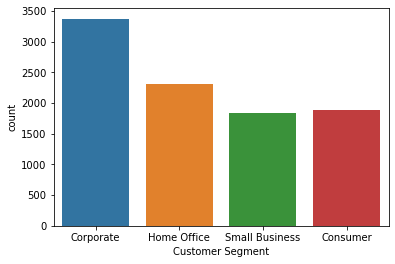

In [73]:
#What is the largest customer segment base for our business?
sns.countplot(x='Customer Segment',data=dataset)
plt.show()
#Coporate customers buy the most from us
#We can design special bundle deals or targeted marketing campaigns to generate more revenue from them

# Product Category vs Sub-Category Analysis

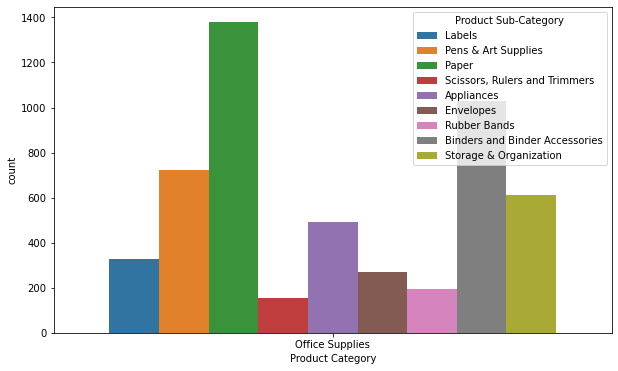

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Office Supplies'],hue='Product Sub-Category')
plt.show()

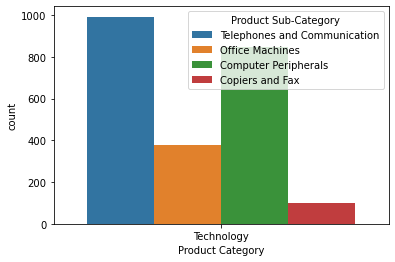

In [84]:
#plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Technology'],hue='Product Sub-Category')
plt.show()

# Time-series analysis

In [85]:
#Determining datatype for Order Date
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [92]:
#Year-wise number of total orders placed
dataset['Order Year']=dataset['Order Date'].dt.year
dataset['Order Year'].value_counts()
#Order placement has increased YoY 

2013    3054
2012    2241
2011    2179
2010    1952
Name: Order Year, dtype: int64

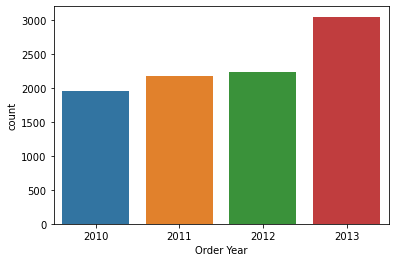

In [90]:
sns.countplot(x='Order Year',data=dataset)
plt.show()

# Category-wise Profit

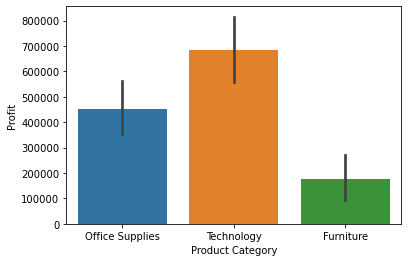

In [108]:
sns.barplot(x='Product Category',y='Profit',data=dataset,estimator=sum)
plt.show()
#Technology products are the highest profit making category followed by Office supplies

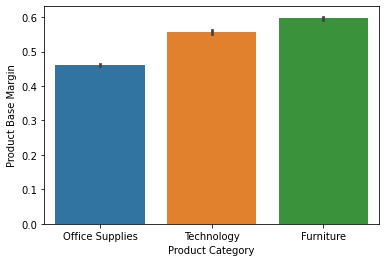

In [109]:
sns.barplot(x='Product Category',y='Product Base Margin',data=dataset,estimator=np.mean)
plt.show()
#Furniture makes the most income per sale as they more expensive items
#Opportunity to increase $ earned from this category by increasing sales number
#Can follow IKEA like setup to encourage cutomers into buying complementary sets

# State-wise Sales (Top & Bottom 5)

In [100]:
#Top 5 states
print('Top 5 states with highest overall sales:')
dataset['State or Province'].value_counts()[:5]
#Increase revenue earned per customer by introducing loyalty programs with special access

Top 5 states with highest sales:


California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64

In [101]:
#Bottom 5 states
print('Bottom 5 states with lowest overall sales:')
dataset['State or Province'].value_counts()[-5:]
#Launch special festive offers for these states to drive purchase

Bottom 5 states with lowest sales:


North Dakota    34
South Dakota    28
Wyoming         21
Rhode Island    20
Delaware        15
Name: State or Province, dtype: int64